# Manual Simulation

This example is the best place to understand the code, and a comprehensive guide to design and execution of desired simulations on
covid19-simulator. Please follow each section and carefully read the instructions about customizing the simulation
to fit your criteria and requirements.

## Import Necessary Libraries
To start a simulation, you need to have the source libraries included in the environment.

In [1]:
import sys, os
sys.path.insert(1, os.path.join(os.pardir, 'src'))

## Build a Test Environment
In this section, we build a simple environment and set it as a basic simulation setting. We can also save these
settings as JSON and change the files if required. In the next steps, we demonstrate the process of building a
simple test environment.

### Family Patterns Dictionary
This is the first object required to build the population generator class. Below is the procedure to construct a
family pattern dictionary. The family pattern dictionary resembles the general pattern of the families in the
simulation.

#### Location
Creating a sample location distribution can be as easy as importing the Test module. Alternatively, you can build
your customized distributions with the help of modules in Utils.

In [ ]:
from population_generator import Test
location_distribution = Test.get_location_distribution()

#### Age
Age distributions can also be created using distribution functions in Utils.py, like the following. Accordingly,
build the age distribution list of all the age distribution subsets.

In [ ]:
from distributions import Truncated_Normal_Distribution

# Adults
age_distribution_2 = Truncated_Normal_Distribution({"lower_bound": 30, "upper_bound": 50, "mean": 40, "std": 5})
age_distribution_1 = Truncated_Normal_Distribution({"lower_bound": 20, "upper_bound": 40, "mean": 30, "std": 5})

# Children
age_distribution_3 = Truncated_Normal_Distribution({"lower_bound": 5, "upper_bound": 15, "mean": 10, "std": 3})
age_distribution_4 = Truncated_Normal_Distribution({"lower_bound": 0, "upper_bound": 5, "mean": 2.5, "std": 2})

age_distributions = [age_distribution_1, age_distribution_2]

#### Health Condition
Health condition distribution is more or less the same as age distribution. Yet, a person's health condition
is determined by a number between 0 and 1.

In [ ]:
health_condition_distribution_1 = Truncated_Normal_Distribution({"lower_bound": 0, "upper_bound": 1,
                                                                 "mean": 0.5, "std": 0.1})
health_condition_distribution_2 = Truncated_Normal_Distribution({"lower_bound": 0, "upper_bound": 1,
                                                                 "mean": 0.5, "std": 0.1})

health_condition_distributions = [health_condition_distribution_1, health_condition_distribution_2]

#### Family Pattern
Now we have almost all the required fields to generate a family pattern. We also need to create a gender list,
consisting of all the family members, respectively. Another family pattern is made in the next code snippet to
demonstrate the flexibility of the object.

In [ ]:
# size of the family
number_of_members = 2

# create a genders list based on number of members
genders = [0, 1]

# build the family pattern object
from population_generator import Family_Pattern
family_pattern_1 = Family_Pattern(number_of_members,
                                    age_distributions,
                                    health_condition_distributions,
                                    genders,
                                    location_distribution)

In [ ]:
# family size is increased here
number_of_members = 4

# for a four member family, age and health condition distributions most be of length 4, respectively
age_distributions = [age_distribution_1, age_distribution_2, age_distribution_3, age_distribution_4]

health_condition_distributions = [health_condition_distribution_1,
                                    health_condition_distribution_2,
                                    health_condition_distribution_1,
                                    health_condition_distribution_2]

# here we have male and female equally
genders = [0, 1, 1, 0]

# build the family pattern object
family_pattern_2 = Family_Pattern(4, age_distributions, health_condition_distributions, genders, location_distribution)

#### Probability Dictionary
Last but not least, the job here is to build a family probability dictionary. This structure represents the presence
probability of each family pattern in society.

In [ ]:
# note that the sum of probabilities must be 1
family_pattern_probability_dict = {family_pattern_1: 0.4, family_pattern_2: 0.6}

### Community Types
A community type object represents the variety of communities, e.g., school, in the simulation environment. Each
community type consists of a list of sub-community types, e.g., teacher, student, etc., and a sub-community
connectivity dictionary, representing the interactions between sub-communities as a graph. Name and location
distribution are also other parts of the structure.

#### Sub Community Types
Sub community types represent a smaller community, generally attached to a particular community type role, e.g.,
student. To build a sub-community type, follow the procedure indicated in the following code snippet.

In [ ]:
# generate an age distribution for this community
age_distribution = Truncated_Normal_Distribution({"lower_bound": 5, "upper_bound": 15, "mean": 10, "std": 1})

# create a time cycle distribution, when people are present in this community
from distributions import Uniform_Whole_Week_Time_Cycle_Distribution
time_cycle_distribution = Uniform_Whole_Week_Time_Cycle_Distribution({
    "start": {
        "lower_bound": 300,
        "upper_bound": 301
    },
    "length": {
        "lower_bound": 250,
        "upper_bound": 500
    }
})

# generate a community type role object
from population_generator import Community_Type_Role
student_type = Community_Type_Role(age_distribution,
                                    Test.get_gender_distribution(),
                                    time_cycle_distribution,
                                    True,
                                    1)

# build the number of members distribution
from distributions import UniformSet_Distribution
number_of_members_distribution = UniformSet_Distribution({
    "probability_dict": {
        30: 1,
    }
})

# generate the sub community type using the Role, members and a connectivity distribution
from population_generator import Sub_Community_Type
sub_community_type_1 = Sub_Community_Type(student_type,
                                          "Student",
                                          number_of_members_distribution,
                                          Test.get_connectivity_distribution(),
                                          Test.get_transmission_potential_distribution())

Another sub-community type is generated below.

In [ ]:

age_distribution = Truncated_Normal_Distribution({"lower_bound": 20, "upper_bound": 40, "mean": 30, "std": 5})

teacher_type = Community_Type_Role(age_distribution,
                                   Test.get_gender_distribution(),
                                   time_cycle_distribution,
                                   True,
                                   1)

number_of_members_distribution = UniformSet_Distribution({
    "probability_dict": {
        5: 1,
    }
})

sub_community_type_2 = Sub_Community_Type(teacher_type,
                                          "Teacher",
                                          number_of_members_distribution,
                                          Test.get_connectivity_distribution(),
                                          Test.get_transmission_potential_distribution())

#### Build a Community Type
The community type object can then be created using sub-community types and connectivity distributions.

In [ ]:
from population_generator import Community_Type
school_type = Community_Type(sub_community_types=[sub_community_type_1, sub_community_type_2],
                                name="School",
                                number_of_communities=4,
                                sub_community_connectivity_dict={0: {1: Test.get_connectivity_distribution()},
                                                                 1: {0: Test.get_connectivity_distribution()}},
                                location_distribution=Test.get_location_distribution(),
                                transmission_potential_dict={0: {1: Test.get_transmission_potential_distribution()},
                                                             1: {0: Test.get_transmission_potential_distribution()}})

### Population Generator
Having the family pattern dictionary and community types, a population generator may be created in the following way.
This class contains all the necessary information to generate a sample population in the simulation environment.

In [ ]:
from population_generator import Population_Generator
population_generator = Population_Generator(population_size=500,
                                            family_pattern_probability_dict=family_pattern_probability_dict,
                                            community_types=[school_type, school_type])

Moreover, with the following command, you can check how your population is spread among the families and communities.
It's also possible to run this task using python multiprocessing library, by just setting is_parallel to True.

In [ ]:
people, graph, families, communities = population_generator.generate_population(is_parallel=False)

### Disease Properties
The disease properties class represents the major specifications related to the spread of Covid-19. Yet, any other
specifications may also be applied here, e.g., for other infectious diseases like MERS.

In [ ]:
from distributions import Uniform_Disease_Property_Distribution
from time_handle import Time

infectious_rate_distribution = Uniform_Disease_Property_Distribution({
    "lower_bound": 0.6,
    "upper_bound": 0.8
})

immunity_distribution = Uniform_Disease_Property_Distribution({
    "lower_bound": 0.05,
    "upper_bound": 0.15
})

disease_period_distribution = Uniform_Disease_Property_Distribution({
    "lower_bound": Time.convert_day_to_minutes(7),
    "upper_bound": Time.convert_day_to_minutes(16)
})

incubation_period_distribution = Uniform_Disease_Property_Distribution({
    "lower_bound": Time.convert_day_to_minutes(2),
    "upper_bound": Time.convert_day_to_minutes(5)
})

death_probability_distribution = Uniform_Disease_Property_Distribution({
    "lower_bound": 0.05,
    "upper_bound": 0.1
})

from disease_manipulator import Disease_Properties
disease_properties = Disease_Properties(infectious_rate_distribution=infectious_rate_distribution
                                        , immunity_distribution=immunity_distribution
                                        , disease_period_distribution=disease_period_distribution
                                        , incubation_period_distribution=incubation_period_distribution
                                        , death_probability_distribution=death_probability_distribution)

## Run the Simulation
Now we start working with the simulator class. The next steps illustrate the functionality of the simulator.

### Primary Settings
The simulator starts with population generator and disease properties objects as base settings. Afterward, the
generate_model function comes to generate a simulation environment and prepare the grounds for simulating the
next steps.

In [ ]:
import timeit
from time_simulator import Simulator

start = timeit.default_timer()

simulator = Simulator(population_generator, disease_properties)
simulator.generate_model()


stop = timeit.default_timer()
print('Time: ', stop - start)

INFO - population_generator.py - 1328 - generate_population - 2020-12-04 14:03:21,069 - Jobs required to generate the model: 2

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 14:03:23,354 - Simulation model generated
Time:  2.5357982809982786


The next step is to run the simulation. To successfully run the simulation, you need to carry out the following steps.

#### End Time
The simulation end time is crucial since it determines how long you want the simulation to keep going. Here we set a
60-day simulation, starting from now.

In [ ]:
from datetime import datetime, timedelta
from time_handle import Time

end_time = Time(delta_time=timedelta(days=60), init_date_time=datetime.now())
print("Simulation ends on: ", end_time.get_day_of_week().name)

#### Spread Period
Determining the spread period is necessary. To have a detailed simulation, you can set lower values or increase the
virus spread check period to reduce the computation cost.

In [ ]:
spread_period = Time(delta_time=timedelta(hours=1))

#### Initial Infected IDs
Any pandemic must start from certain people, i.e., the initially infected subjects. You can determine their ids as a
list.

In [ ]:
import random

initial_infected_ids = random.sample(range(200), 10)
print(initial_infected_ids)

#### Observers List
The observer is the module responsible for saving data into the database. Using the Observer, you can observe data
during the simulation and use them later in plots, reasoning, etc. The simulator can handle a list of observers with
various trigger conditions.

In [ ]:
from observer import Observer
from conditions import Time_Period_Condition
observer = Observer(Time_Period_Condition(Time(delta_time=timedelta(hours=5))), True)

# generate the observers list
observers_list = [observer]

#### Commands
The commands list is used to create a policy to contract the pandemic. A simple strict command may be to quarantine
all the communities.

In [ ]:
commands_list = []

### Run the Simulation
At this stage, the only remaining step is running the simulation. This might take a while, depending on the population size, and the total number of days. Other factors, such as the number of observers, are also significant in changing the
simulation time.

The report statistics can be varied from 0 (default) to 1 and 2, if you want to review more details of the simulation
at the end.

In [ ]:
import timeit

start = timeit.default_timer()

simulator.simulate(end_time=end_time,
                    spread_period=spread_period,
                    initialized_infected_ids=initial_infected_ids,
                    commands=commands_list,
                    observers=observers_list,
                    report_statistics=2)

stop = timeit.default_timer()

print('Time: ', stop - start)

## Plot the Results
Here are some useful plots related to the observer. Remember that you can always retrieve the data associated with a
specific observer using the simulator.database functions. However, the observer object provides some useful plots
itself.

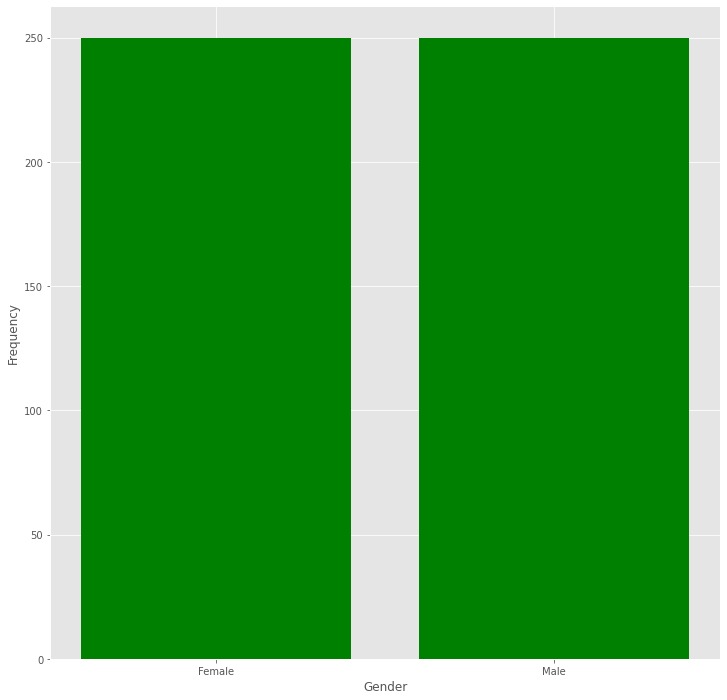

250 250


In [ ]:
observer.plot_initial_bar_gender()

# validate the observer plot
men, women = 0, 0
for person in simulator.people:
    if person.gender == 1:
        women += 1
    elif person.gender == 0:
        men += 1

print(men, women)

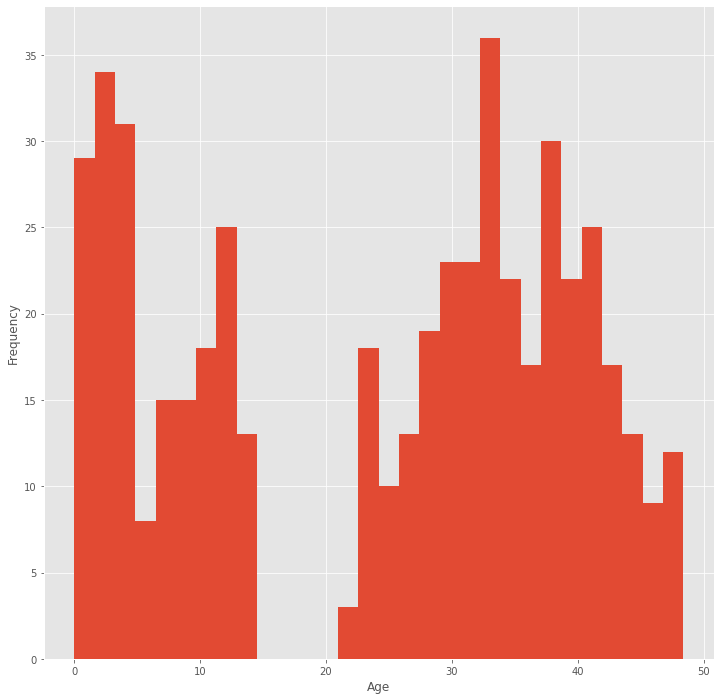

188


In [ ]:
observer.plot_initial_hist_age()

# plot verification
under_20 = 0
for person in simulator.people:
    if (person.age > 0) and (person.age < 20):
        under_20 += 1

print(under_20)

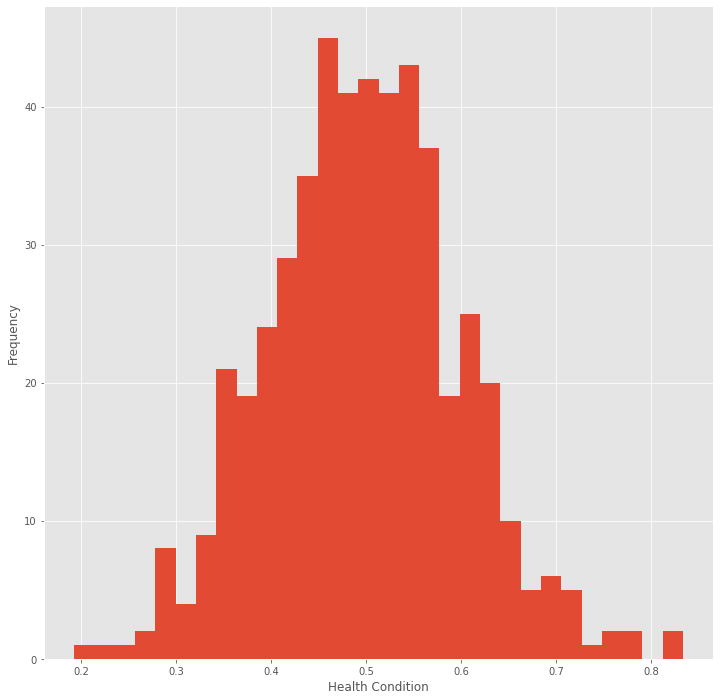

In [ ]:
observer.plot_initial_hist_health_condition()

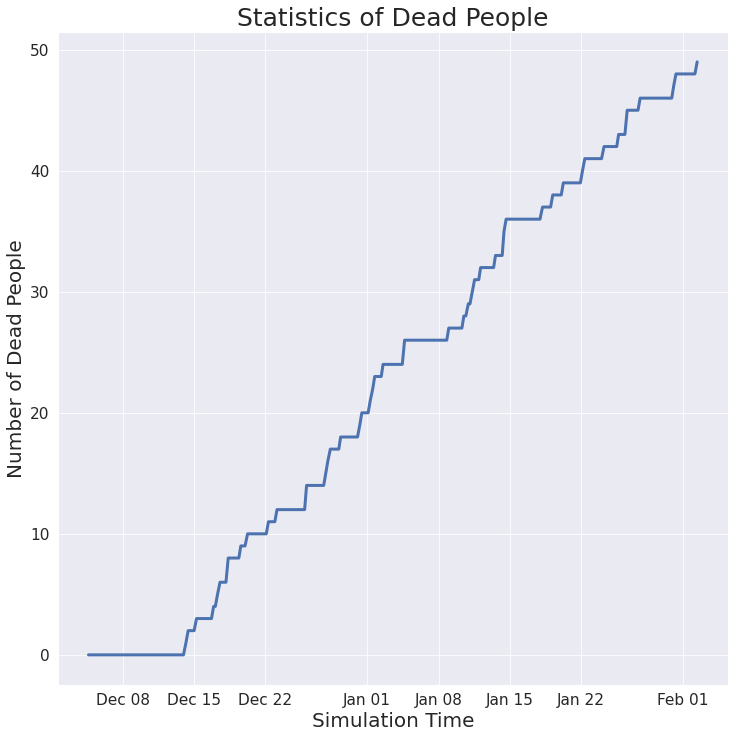

In [ ]:
from utils import Health_Condition, Infection_Status
observer.plot_disease_statistics_during_time(Health_Condition.DEAD)

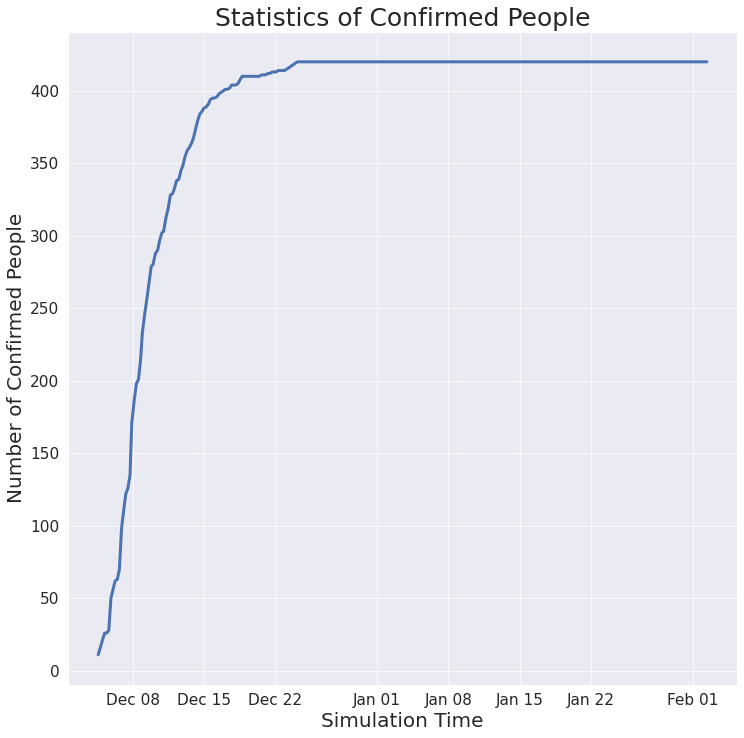

In [ ]:
observer.plot_disease_statistics_during_time(Health_Condition.HAS_BEEN_INFECTED)

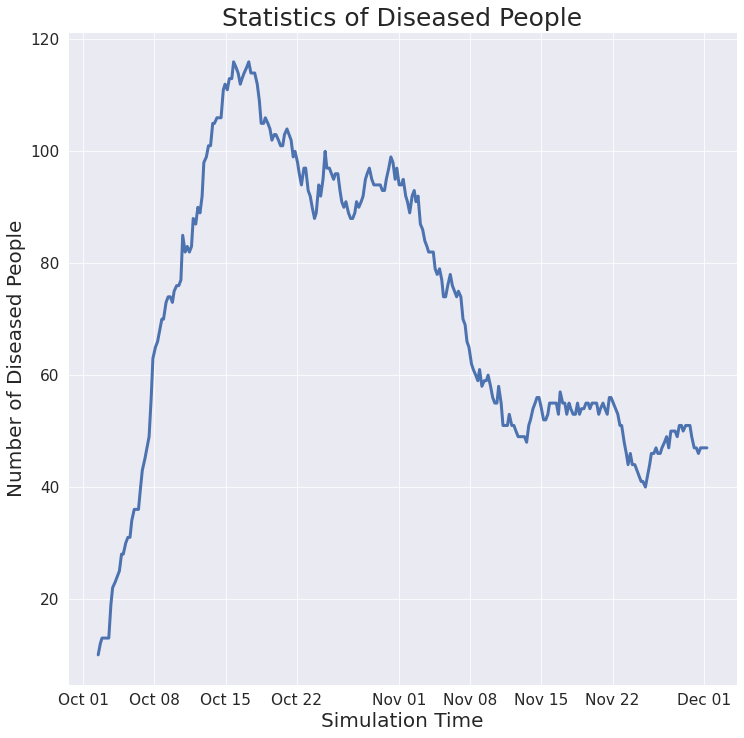

In [ ]:
observer.plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

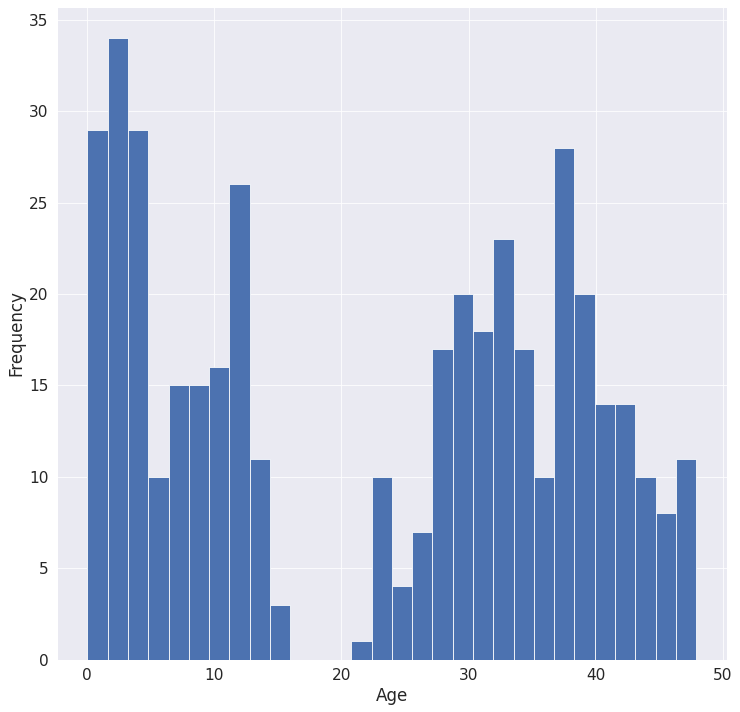

In [ ]:
observer.plot_final_hist_age(Health_Condition.HAS_BEEN_INFECTED)

## Add a Condition
You can always add a new condition using the following structure and by inheriting the condition class. The is_satisfied function determines whether the condition is satisfied and is_able_to_be_removed determines whether the condition is useless from now on or not.

In [ ]:
from conditions import Condition

# Build your own customized condition
class More_Than_X_Deaths_Condition(Condition):

    def __init__(self, x):
        super().__init__()
        self.x = x
        self.satisfied = False

    def is_satisfied(self, simulator: Simulator, end_time: Time):
        temp = self.x
        for person in simulator.people:
            if not person.is_alive:
                temp -= 1
        if temp <= 0:
            self.satisfied = True
            return [simulator.clock]
        return []

    def is_able_to_be_removed(self):
        return self.satisfied

The newly generated condition may be used in both observers and commands. Here is an example of how to use the condition in an observer.

In [ ]:
from observer import Observer
observer = Observer(More_Than_X_Deaths_Condition(10), True)

# generate the observers list
observers_list = [observer]

simulator.simulate(end_time=end_time,
                    spread_period=spread_period,
                    initialized_infected_ids=initial_infected_ids,
                    commands=commands_list,
                    observers=observers_list)

Now we validate the correctness of our condition.

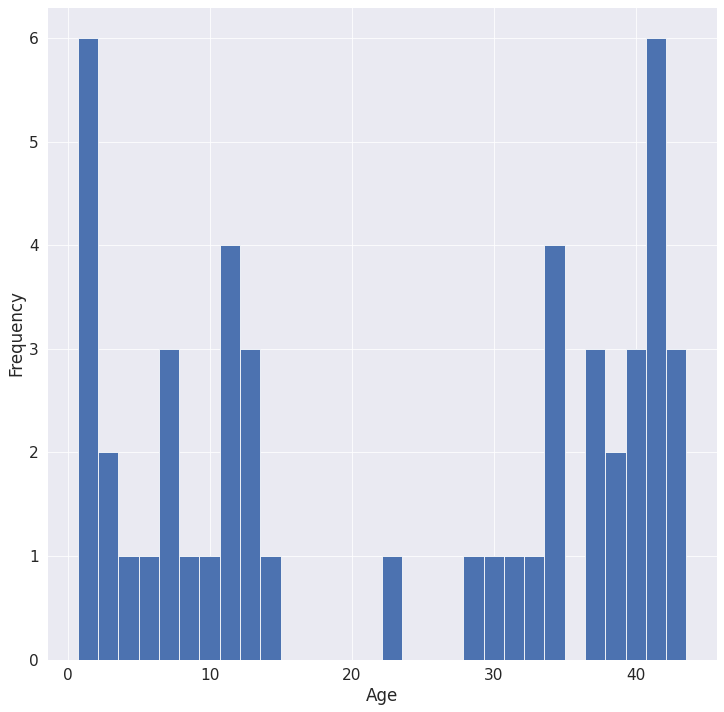

In [ ]:
observer.plot_specific_condition_hist_age(0, Health_Condition.DEAD)

## Add a Command
In the same way of adding a condition, you can also add a command using the Command class. New commands should follow the base class structure and functions in order to work correctly. You can determine the action using the take_action function.

In [ ]:
from commands import Command

# Build your own customized command
class Quarantine_Diseased_People(Command):
    def __init__(self, condition: Condition):
        super().__init__(condition)
        self.condition = condition

    def take_action(self, simulator: Simulator, end_time: Time):
        if self.condition.is_satisfied(simulator, end_time):
            for person in simulator.people:
                if person.infection_status is Infection_Status.CONTAGIOUS or \
                        person.infection_status is Infection_Status.INCUBATION:
                    person.quarantine()

    # This method is necessary due to automation purposes
    def to_json(self):
        return dict(name=self.__class__.__name__,
                    condition=self.condition)

## Save the Main Objects as JSON Configuration Files
The objects can be saved as json files. These files may also be employed later to avoid preparations.

In [ ]:
from json_handle import Parser

# build parser object
json_parser = Parser()

# save population generator
json_parser.build_json(population_generator)
json_parser.save_json()

# save disease properties
json_parser.build_json(disease_properties)
json_parser.save_json()

# save population generator
json_parser.build_json(simulator)
json_parser.save_json()
